## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [2]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aaron\AppData\Roa

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP =[ 0.15,0.25,0.35,0.45]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for a in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout_EXP = %.6f" % (a))
    model = build_mlp(input_shape=x_train.shape[1:],  drp_ratio=a)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Dropout_EXP-%s" % str(a)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Dropout_EXP = 0.150000


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)         

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 119us/step - loss: 2.2014 - acc: 0.1798 - val_loss: 2.0008 - val_acc: 0.2896
Epoch 2/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.0072 - acc: 0.2678 - val_loss: 1.8739 - val_acc: 0.3392
Epoch 3/30
50000/50000 [==============================] - 6s 112us/step - loss: 1.9190 - acc: 0.3081 - val_loss: 1.8058 - val_acc: 0.3621
Epoch 4/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.8646 - acc: 0.3275 - val_loss: 1.7556 - val_acc: 0.3833
Epoch 5/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.8192 - acc: 0.3454 - val_loss: 1.7194 - val_acc: 0.3926
Epoch 6/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.7819 - acc: 0.3615 - val_loss: 1.6782 - val_acc: 0.4059
Epoch 7/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.7558 - acc: 0.3721 - val_loss: 1.6511 - 

50000/50000 [==============================] - 6s 110us/step - loss: 1.6213 - acc: 0.4252 - val_loss: 1.5184 - val_acc: 0.4626
Epoch 20/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.6095 - acc: 0.4227 - val_loss: 1.5071 - val_acc: 0.4661
Epoch 21/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.5998 - acc: 0.4285 - val_loss: 1.4992 - val_acc: 0.4724
Epoch 22/30
50000/50000 [==============================] - 5s 110us/step - loss: 1.5929 - acc: 0.4334 - val_loss: 1.4871 - val_acc: 0.4732
Epoch 23/30
50000/50000 [==============================] - 5s 110us/step - loss: 1.5798 - acc: 0.4372 - val_loss: 1.4745 - val_acc: 0.4795
Epoch 24/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.5694 - acc: 0.4432 - val_loss: 1.4712 - val_acc: 0.4754
Epoch 25/30
50000/50000 [==============================] - 6s 111us/step - loss: 1.5586 - acc: 0.4452 - val_loss: 1.4729 - val_acc: 0.4776
Epoch 26/30
50000/50000 [==============

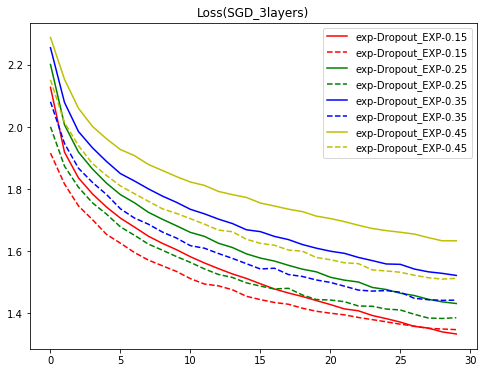

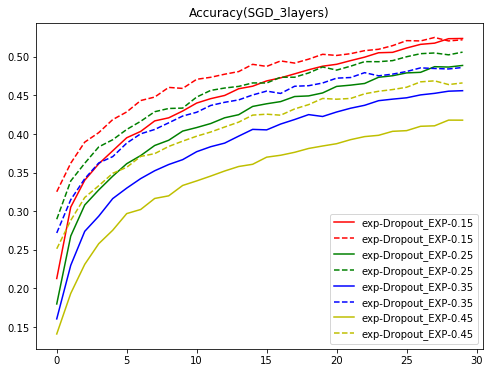

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(SGD_3layers)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(SGD_3layers)")
plt.legend()
plt.show()

In [9]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP =[ 0.15,0.25,0.35,0.45]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for a in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout_EXP = %.6f" % (a))
    model = build_mlp(input_shape=x_train.shape[1:],  drp_ratio=a)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Dropout_EXP-%s" % str(a)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout_EXP = 0.150000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1

Epoch 5/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.9118 - acc: 0.2991 - val_loss: 1.7958 - val_acc: 0.3611
Epoch 6/30
50000/50000 [==============================] - 6s 119us/step - loss: 1.8715 - acc: 0.3178 - val_loss: 1.7596 - val_acc: 0.3748
Epoch 7/30
50000/50000 [==============================] - 6s 116us/step - loss: 1.8400 - acc: 0.3324 - val_loss: 1.7252 - val_acc: 0.3903
Epoch 8/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.8162 - acc: 0.3438 - val_loss: 1.7031 - val_acc: 0.3940
Epoch 9/30
50000/50000 [==============================] - 6s 115us/step - loss: 1.7904 - acc: 0.3523 - val_loss: 1.6783 - val_acc: 0.4078
Epoch 10/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.7697 - acc: 0.3588 - val_loss: 1.6538 - val_acc: 0.4148
Epoch 11/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.7477 - acc: 0.3724 - val_loss: 1.6277 - val_acc: 0.4215
Epoch 12/30
50000/50000 [=======

50000/50000 [==============================] - 6s 114us/step - loss: 1.7174 - acc: 0.3783 - val_loss: 1.5884 - val_acc: 0.4368
Epoch 22/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.7053 - acc: 0.3832 - val_loss: 1.5797 - val_acc: 0.4355
Epoch 23/30
50000/50000 [==============================] - 6s 115us/step - loss: 1.6966 - acc: 0.3849 - val_loss: 1.5610 - val_acc: 0.4379
Epoch 24/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.6912 - acc: 0.3881 - val_loss: 1.5531 - val_acc: 0.4446
Epoch 25/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.6806 - acc: 0.3930 - val_loss: 1.5539 - val_acc: 0.4457
Epoch 26/30
50000/50000 [==============================] - 6s 112us/step - loss: 1.6655 - acc: 0.3992 - val_loss: 1.5511 - val_acc: 0.4483
Epoch 27/30
50000/50000 [==============================] - 6s 113us/step - loss: 1.6654 - acc: 0.4014 - val_loss: 1.5339 - val_acc: 0.4502
Epoch 28/30
50000/50000 [==============

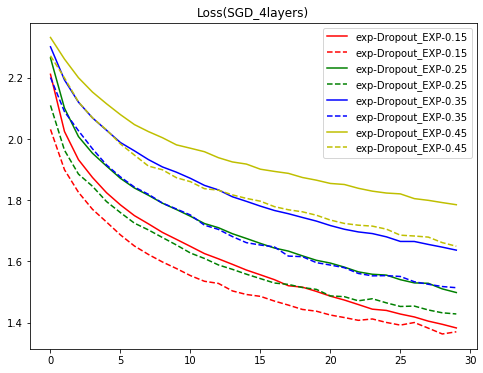

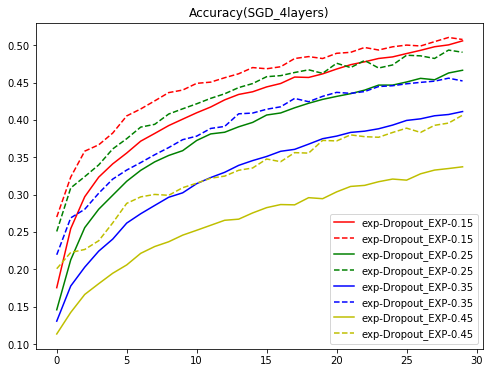

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(SGD_4layers)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(SGD_4layers)")
plt.legend()
plt.show()

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for a in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout_EXP = %.6f" % (a))
    model = build_mlp(input_shape=x_train.shape[1:],  drp_ratio=a)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Dropout_EXP-%s" % str(a)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Dropout_EXP = 0.150000


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)         

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 163us/step - loss: 2.0665 - acc: 0.2353 - val_loss: 1.8460 - val_acc: 0.3434
Epoch 2/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.8865 - acc: 0.3134 - val_loss: 1.7732 - val_acc: 0.3653
Epoch 3/30
50000/50000 [==============================] - 8s 152us/step - loss: 1.8344 - acc: 0.3341 - val_loss: 1.7233 - val_acc: 0.3713
Epoch 4/30
50000/50000 [==============================] - 22s 444us/step - loss: 1.7870 - acc: 0.3541 - val_loss: 1.6796 - val_acc: 0.4104
Epoch 5/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.7528 - acc: 0.3680 - val_loss: 1.6718 - val_acc: 0.4061
Epoch 6/30
50000/50000 [==============================] - 9s 182us/step - loss: 1.7335 - acc: 0.3702 - val_loss: 1.6371 - val_acc: 0.4197
Epoch 7/30
50000/50000 [==============================] - 9s 171us/step - loss: 1.7142 - acc: 0.3832 - val_loss: 1.6231 -

50000/50000 [==============================] - 8s 153us/step - loss: 1.7387 - acc: 0.3690 - val_loss: 1.6652 - val_acc: 0.4149
Epoch 20/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.7171 - acc: 0.3792 - val_loss: 1.6453 - val_acc: 0.4272
Epoch 21/30
50000/50000 [==============================] - 8s 152us/step - loss: 1.7109 - acc: 0.3831 - val_loss: 1.6274 - val_acc: 0.4395
Epoch 22/30
50000/50000 [==============================] - 8s 152us/step - loss: 1.7047 - acc: 0.3830 - val_loss: 1.6224 - val_acc: 0.4347
Epoch 23/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.7241 - acc: 0.3795 - val_loss: 1.6703 - val_acc: 0.4291
Epoch 24/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.7021 - acc: 0.3861 - val_loss: 1.6293 - val_acc: 0.4408
Epoch 25/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.7029 - acc: 0.3856 - val_loss: 1.6459 - val_acc: 0.4261
Epoch 26/30
50000/50000 [==============

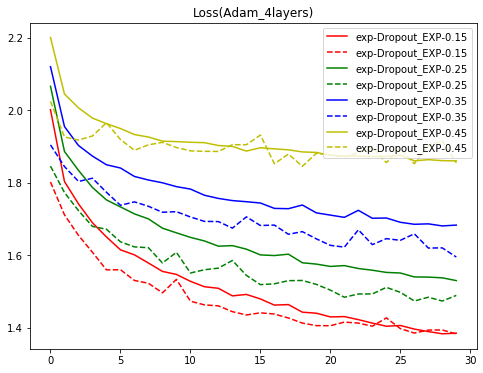

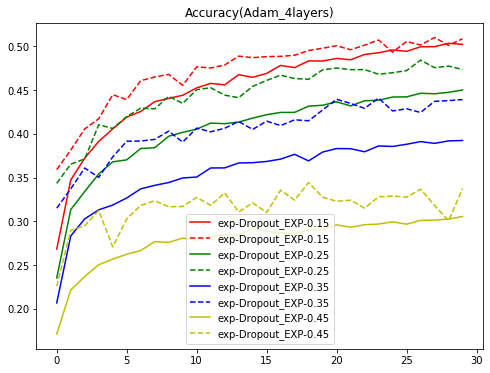

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(Adam_4layers)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(Adam_4layers)")
plt.legend()
plt.show()